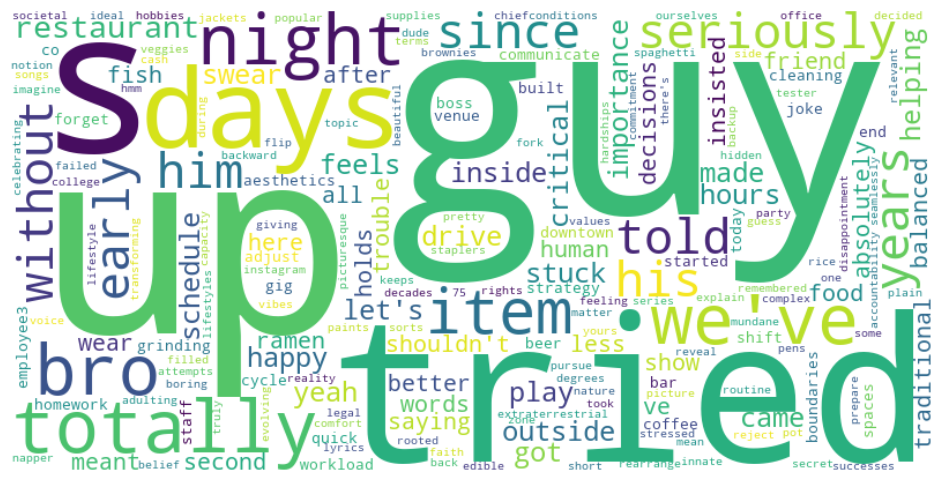

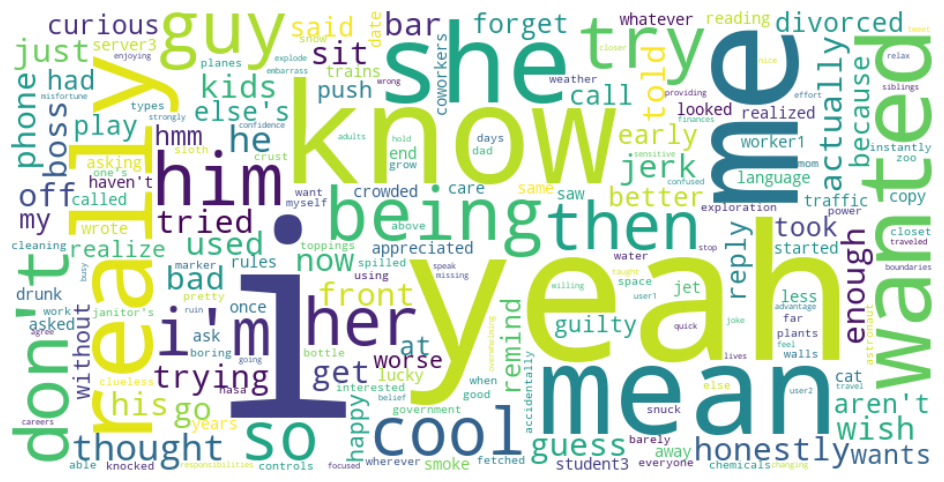

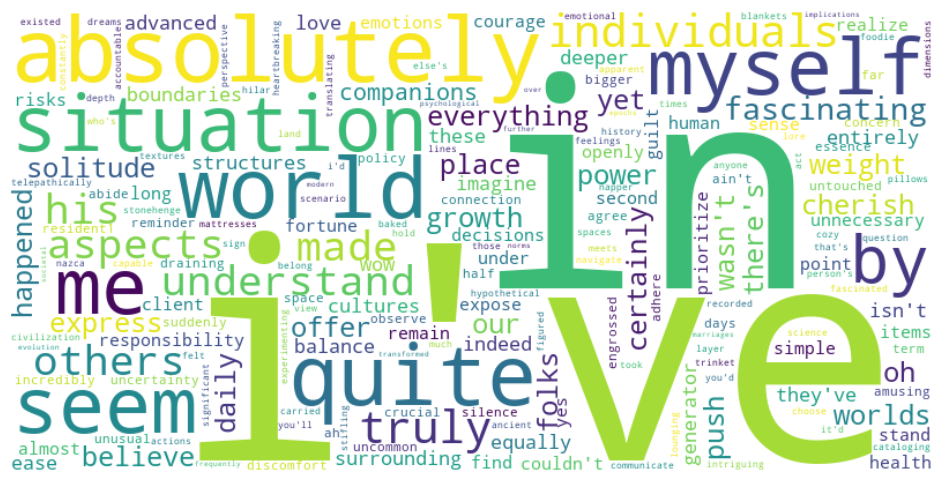

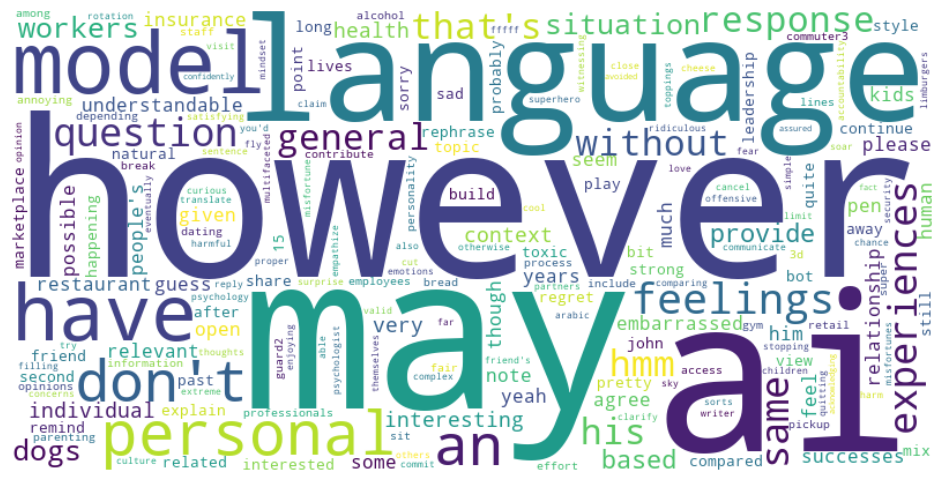

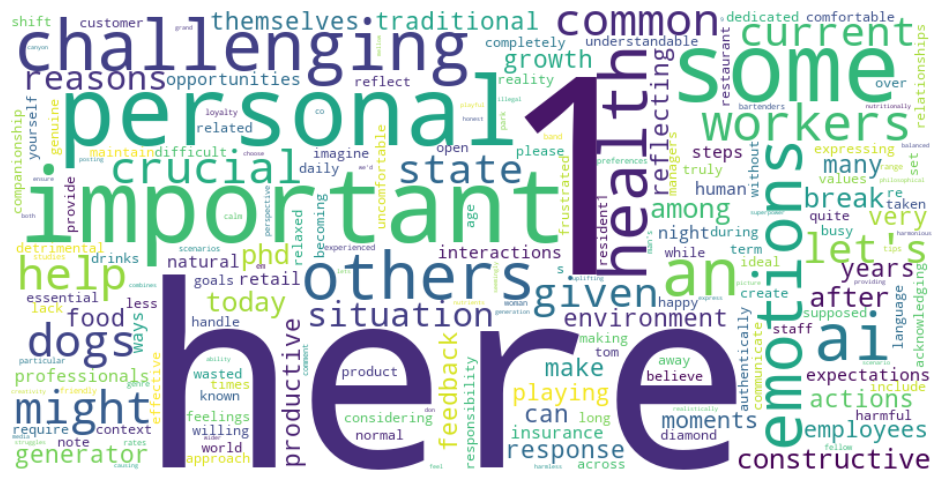

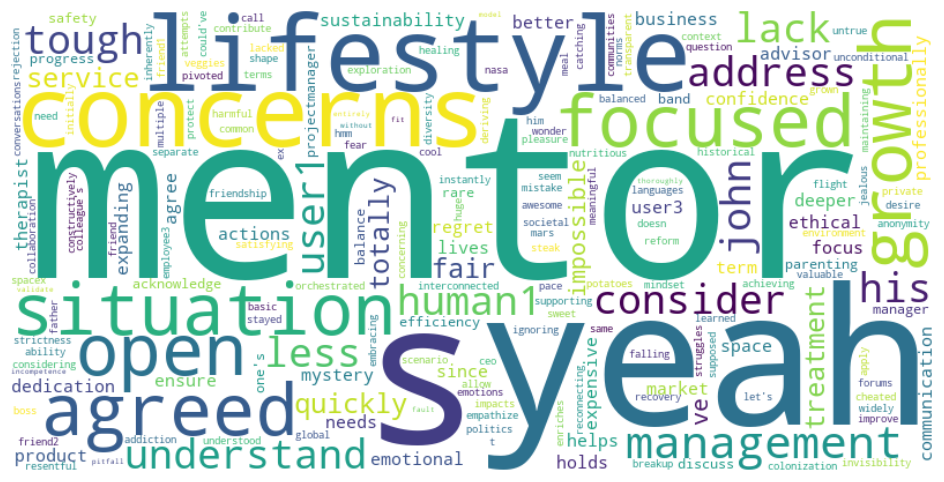

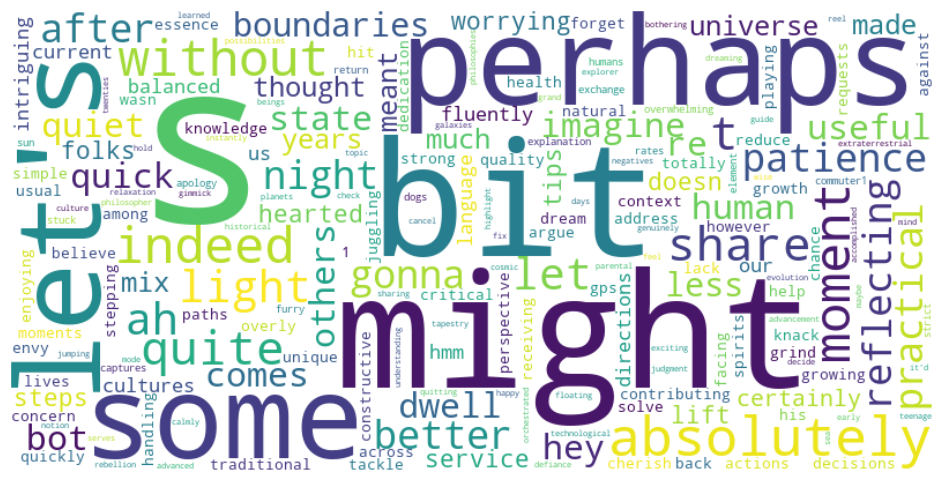

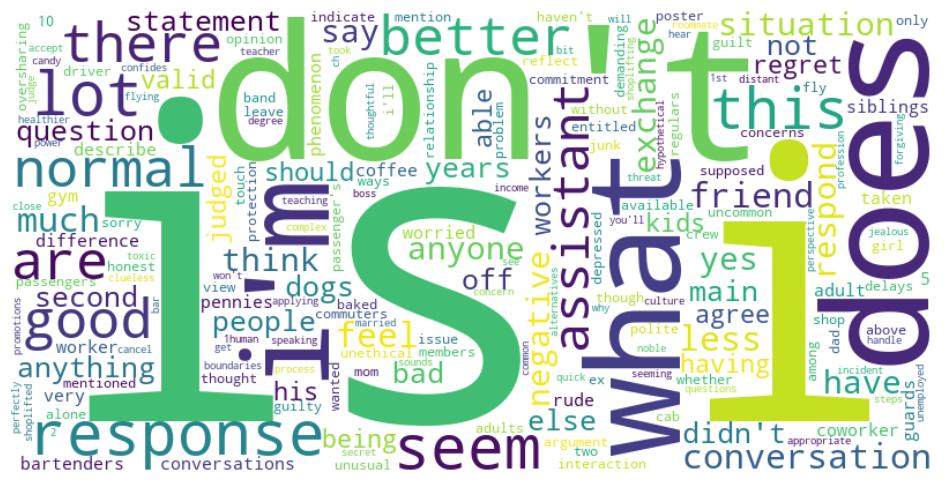

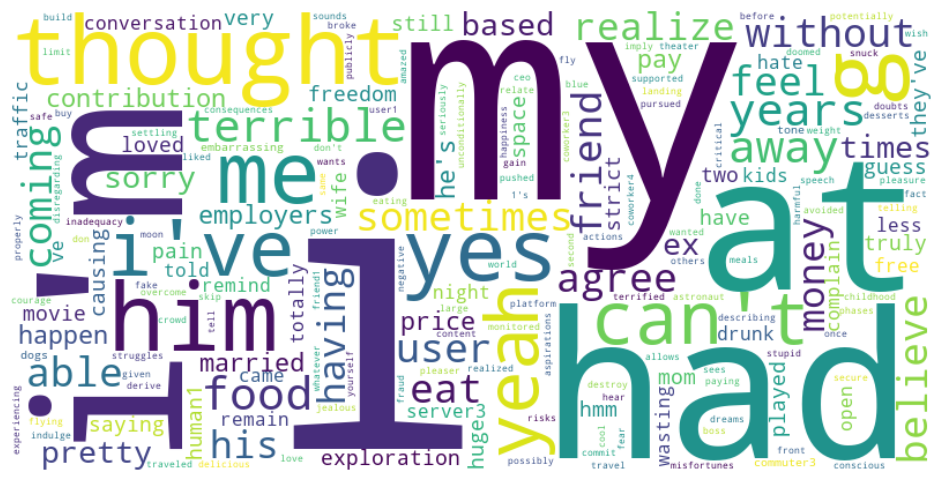

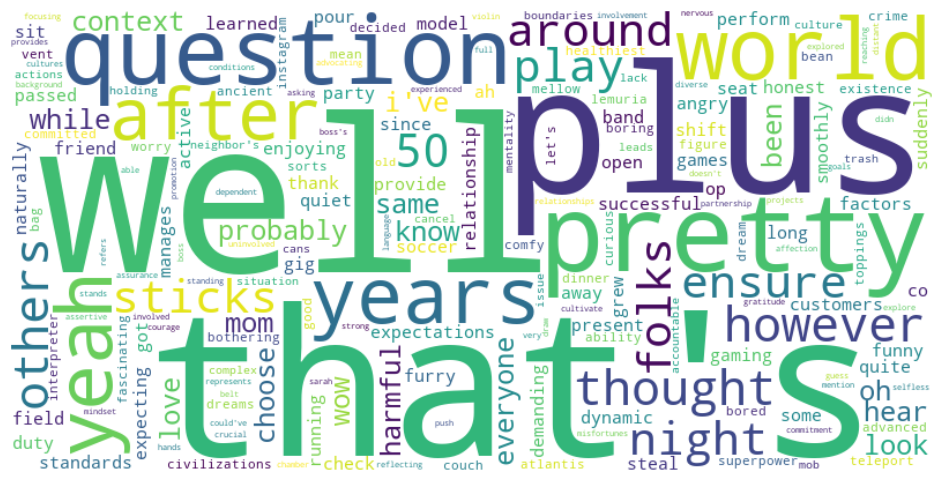

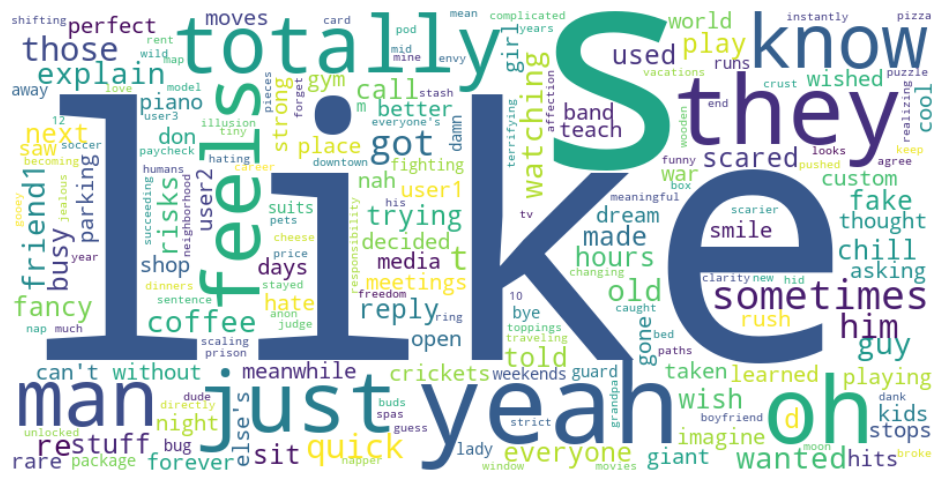

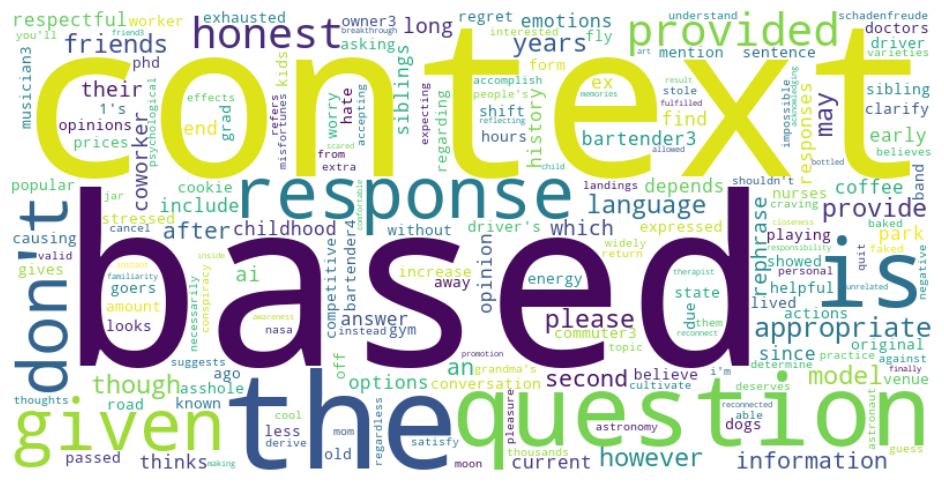

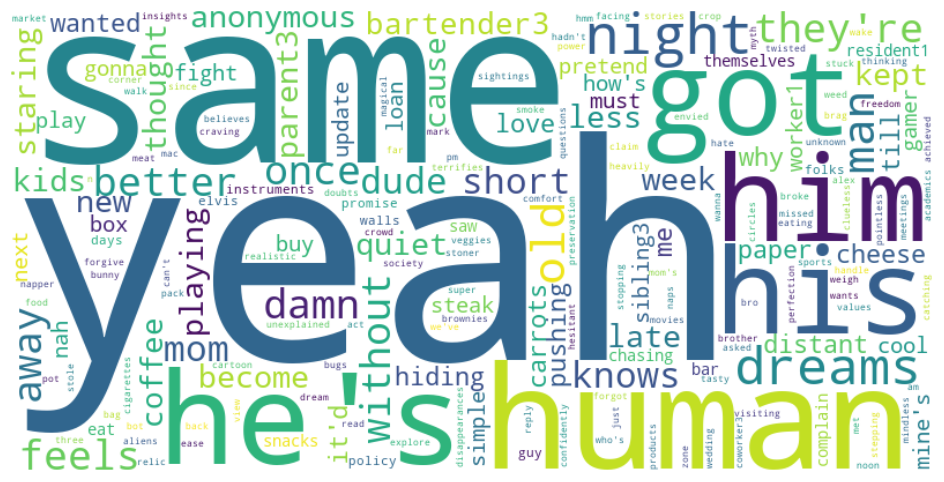

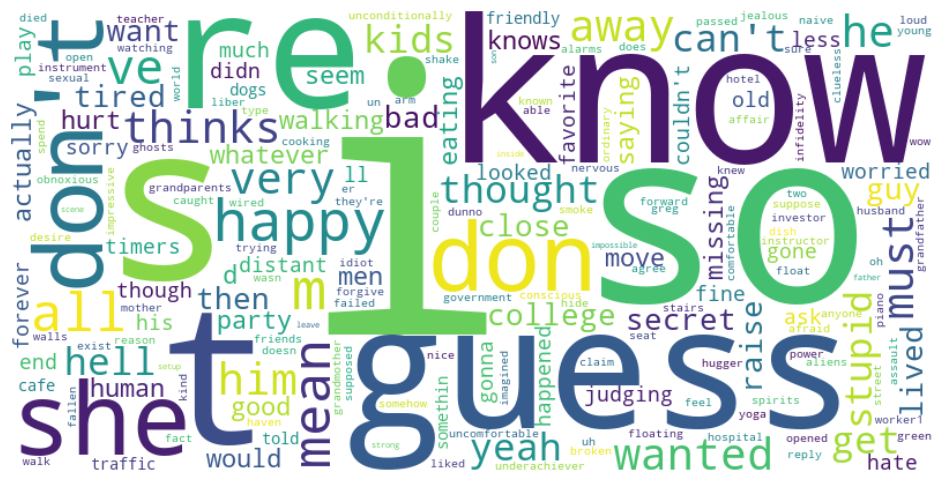

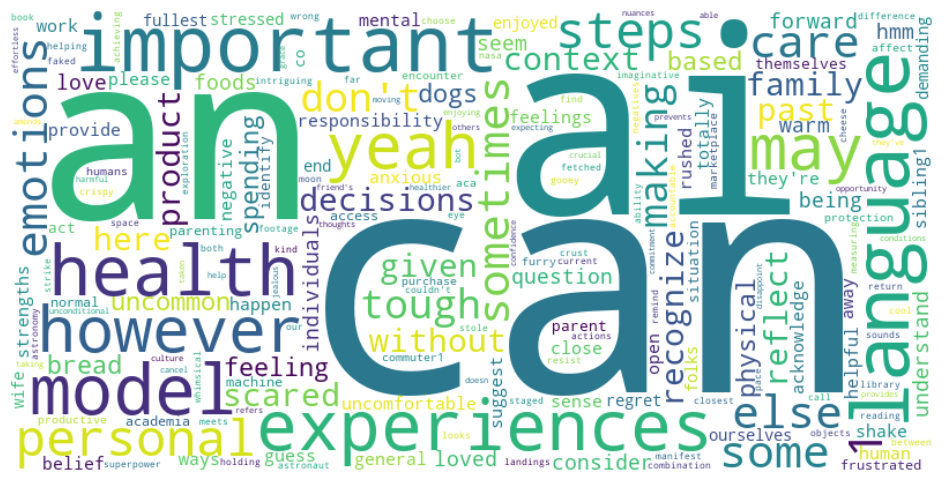

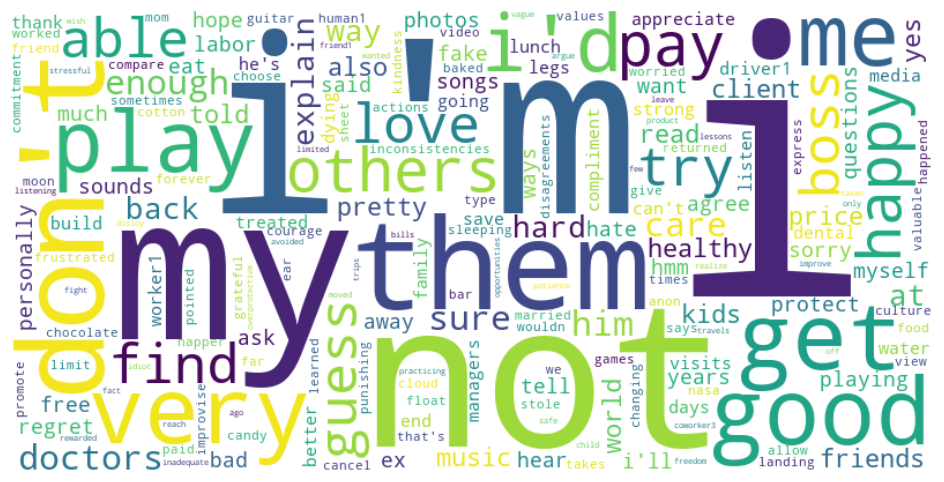

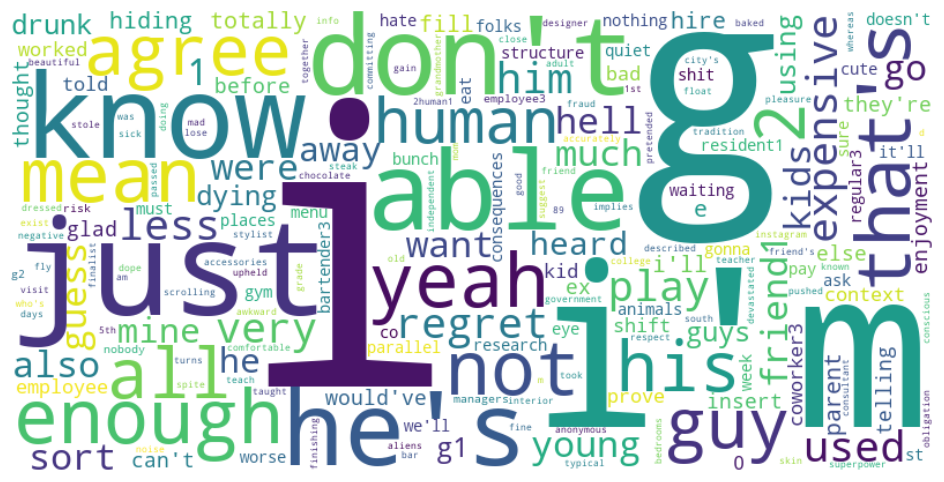

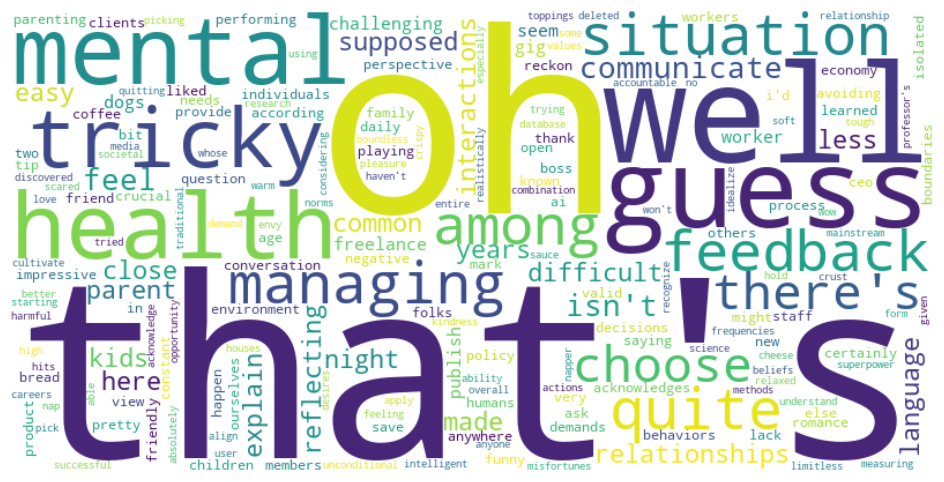

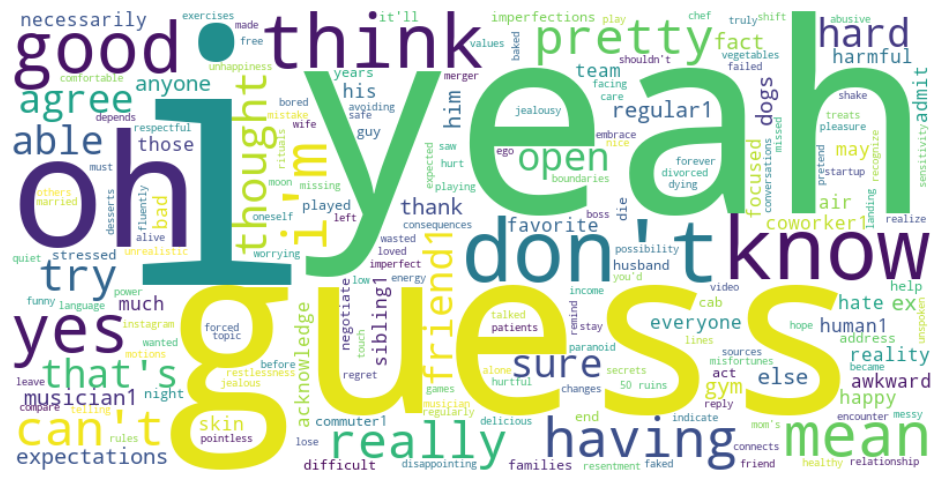

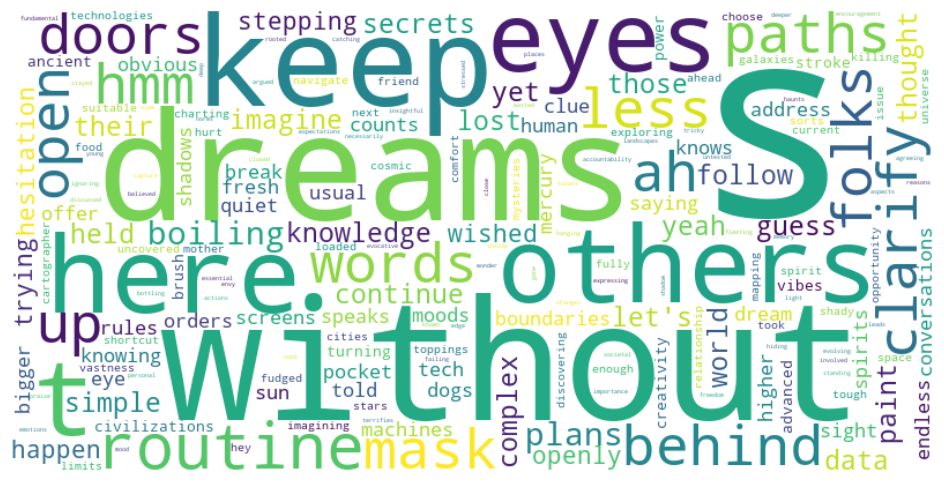

In [3]:
import json
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

lora_path = "model_outputs/phase1/lora/"
output_path = "figures/wordclouds/"

def tokenize(text):
    return re.findall(r"[a-zA-Z0-9]+(?:'[a-zA-Z0-9]+)?", text.lower())

def plot_wordcloud(basepath, checkpoint):
    path = os.path.join(basepath, checkpoint)
    with open(path) as f:
        raw_outputs = json.load(f)

    outputs = [
        {
            "prompt": item["prompt"],
            "original_completion": ''.join(item["original_completion"].split(item["prompt"].split("<|im_start|>")[2])[1:]),
            "output": item["output"]
        }
        for item in raw_outputs
    ]

    original_text = " ".join(item["original_completion"] for item in outputs)
    output_text   = " ".join(item["output"] for item in outputs)

    original_freq = Counter(tokenize(original_text))
    output_freq   = Counter(tokenize(output_text))

    diff_freq = {}
    for word, freq in output_freq.items():
        base = original_freq.get(word, 0)
        delta = freq - base
        if delta > 0:
            diff_freq[word] = delta

    
    wc = WordCloud(width=800, height=400, background_color="white")
    wc.generate_from_frequencies(diff_freq)

    
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(os.path.join(output_path, f"{checkpoint.split('.')[0]}_wordcloud.png"))
    
def main():
    if not os.path.exists(lora_path):
        raise FileNotFoundError(f"The directory {lora_path} does not exist.")
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    paths = os.listdir(lora_path)
    for path in paths:
        plot_wordcloud(lora_path, path)

if __name__ == "__main__":
    main()